In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import enum
import scanpy as sc

filename = "E14.5_E1S3_MOSTA.h5ad"

In [4]:
adata = sc.read(filename)
adata

AnnData object with n_obs × n_vars = 92928 × 18582
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'spatial_leiden_res4', 'spatial_leiden_res5', 'spatial_leiden_res6', 'spatial_leiden_res7', 'annotation', 'Regulon - A1cf', 'Regulon - Alx1', 'Regulon - Alx3', 'Regulon - Alx4', 'Regulon - Arx', 'Regulon - Atf2', 'Regulon - Atf4', 'Regulon - Atf5', 'Regulon - Bach1', 'Regulon - Barhl1', 'Regulon - Barhl2', 'Regulon - Barx1', 'Regulon - Barx2', 'Regulon - Bclaf1', 'Regulon - Bhlhe22', 'Regulon - Bhlhe40', 'Regulon - Bmyc', 'Regulon - Bptf', 'Regulon - Brca1', 'Regulon - Brf1', 'Regulon - Cdx1', 'Regulon - Cdx2', 'Regulon - Cebpa', 'Regulon - Cebpb', 'Regulon - Cebpd', 'Regulon - Cebpg', 'Regulon - Cebpz', 'Regulon - Cnot4', 'Regulon - Creb1', 'Regulon - Creb3', 'Regulon - Creb3l1', 'Regulon - Creb3l2', 'Regulon - Creb5', 'Regulon - Ctcf', 'Regulon - Cux1', 'Regulon - Cxxc1', 'Regulon - D3Ertd254e', 'Regulon - Dbx1', 'Regulon - Dbx2', 'Regulon 

In [5]:
# Access the main data matrix
X = adata.X
# Access the annotations of the samples
obs = adata.obs
# Access the annotations of the features
var = adata.var
# Access the multiple annotations of the samples
obsm = adata.obsm
# Access the multiple annotations of the features
varm = adata.varm
# Access the unstructured annotations
uns = adata.uns

In [6]:
cluster_alg = 'spatial_leiden_res6' 

In [7]:
clusters = adata.obs[cluster_alg]
clusters

cell_name
100_120    5
100_121    5
100_122    5
100_123    5
100_124    5
          ..
99_84      5
99_85      5
99_86      5
99_87      5
99_88      5
Name: spatial_leiden_res6, Length: 92928, dtype: category
Categories (66, object): ['0', '1', '2', '3', ..., '62', '63', '64', '65']

/usr/local/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/usr/local/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/usr/local/lib/python3.10/site-packages/umap/distances.py:1086: NumbaDeprecationWarning: The 'nopython' keyword argume

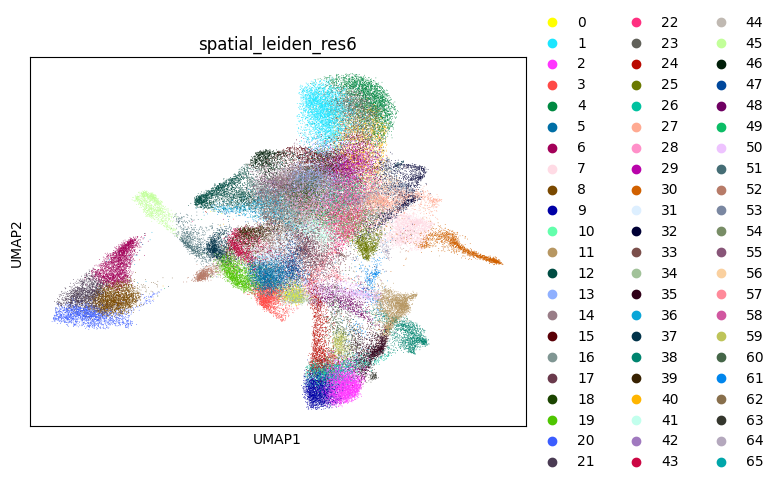

In [8]:
# Run PCA first as UMAP relies on it
sc.tl.pca(adata, svd_solver='arpack')

# Compute the neighborhood graph
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

# Run UMAP
sc.tl.umap(adata)

# Plot the clusters
sc.pl.umap(adata, color=cluster_alg)


In [9]:
# Define the clusters you are interested in
clusters_of_interest = ['1', '3', '7']

# Subset the AnnData object to include only cells from the specified clusters
selected_clusters = adata[adata.obs[cluster_alg].isin(clusters_of_interest), :]

/usr/local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


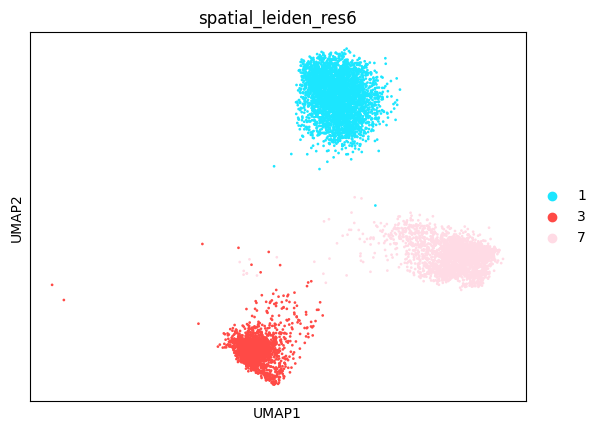

In [10]:
sc.pl.umap(selected_clusters, color=cluster_alg)

In [11]:
adata.var.n_cells

gene_short_name
1110012L19Rik     3251
Actb             93081
Afp              32865
Agt               1149
Apba3             2072
                 ...  
Gm36500             50
Csn1s2b             60
A730035I17Rik       60
Kcns2               67
Gm26548             80
Name: n_cells, Length: 18582, dtype: int64

In [22]:
adata.var.n_cells_by_counts

gene_short_name
1110012L19Rik     3225
Actb             89697
Afp              32356
Agt               1142
Apba3             2052
                 ...  
Gm36500             48
Csn1s2b             60
A730035I17Rik       59
Kcns2               67
Gm26548             80
Name: n_cells_by_counts, Length: 18582, dtype: int64

In [17]:
len(adata.obsm['spatial'])

92928

In [21]:
len(adata.varm['PCs'])

18582

In [23]:
len(adata.obs)

92928